In [ ]:
# This Jupyter Notebook is designed to process and analyze protein embeddings generated by a preceding script ( protein_folding/esm2_model_embeddings/extract_embeddings_esm2.py). The primary objective is to dynamically locate the output directory containing the .npy embedding files, read the files, and extract key dimensional information about the embeddings.


In [9]:
import os
import numpy as np

# Function to iterate through embeddings and display dimensions
def inspect_embeddings(relative_path):
    # Get the absolute path based on the relative path
    base_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
    output_dir = os.path.join(base_path, relative_path)

    # Check if the directory exists
    if not os.path.exists(output_dir):
        print(f"Error: Directory '{output_dir}' does not exist.")
        return

    # Iterate through all files in the directory
    print(f"Inspecting embeddings in {output_dir}...")
    for file_name in os.listdir(output_dir):
        if file_name.endswith("_embedding.npy"):
            file_path = os.path.join(output_dir, file_name)

            # Load the embedding file
            embedding = np.load(file_path)

            # Get the dimensions of the embedding
            dims = embedding.shape

            # Print details
            print(f"File: {file_name}")
            print(f"  Dimensions: {dims}")

            # If it's a concatenated embedding (multiple layers), further inspect each layer
            if len(dims) == 2:  # Assuming 2D array: (tokens, features) or (layers x features)
                num_layers, num_features = dims
                print(f"  Number of Layers: {num_layers}")
                print(f"  Features per Layer: {num_features}")
            elif len(dims) == 3:  # Assuming 3D array: (layers, tokens, features)
                num_layers, num_tokens, num_features = dims
                print(f"  Number of Layers: {num_layers}")
                print(f"  Tokens per Layer: {num_tokens}")
                print(f"  Features per Token: {num_features}")

    print("Inspection completed.")

# Example usage
relative_path = "esm2_model_embeddings/examples/output_embeddings"  # Provide the path relative to the current working directory
inspect_embeddings(relative_path)


Inspecting embeddings in /pollard/data/projects/cpino/protein_folding/esm2_model_embeddings/examples/output_embeddings...
File: UNIPROT:Q30PL1_embedding.npy
  Dimensions: (624, 1280)
  Number of Layers: 624
  Features per Layer: 1280
File: UNIPROT:Q5FN17_embedding.npy
  Dimensions: (837, 1280)
  Number of Layers: 837
  Features per Layer: 1280
File: UNIPROT:O66780_embedding.npy
  Dimensions: (513, 1280)
  Number of Layers: 513
  Features per Layer: 1280
File: UNIPROT:A5ULU4_embedding.npy
  Dimensions: (1203, 1280)
  Number of Layers: 1203
  Features per Layer: 1280
File: UNIPROT:P36655_embedding.npy
  Dimensions: (1701, 1280)
  Number of Layers: 1701
  Features per Layer: 1280
Inspection completed.


In [24]:
path_directory = os.path.abspath(os.path.join(os.getcwd(), "../.."))
output_dir = os.path.join(path_directory, "esm2_model_embeddings/examples/output_embeddings")

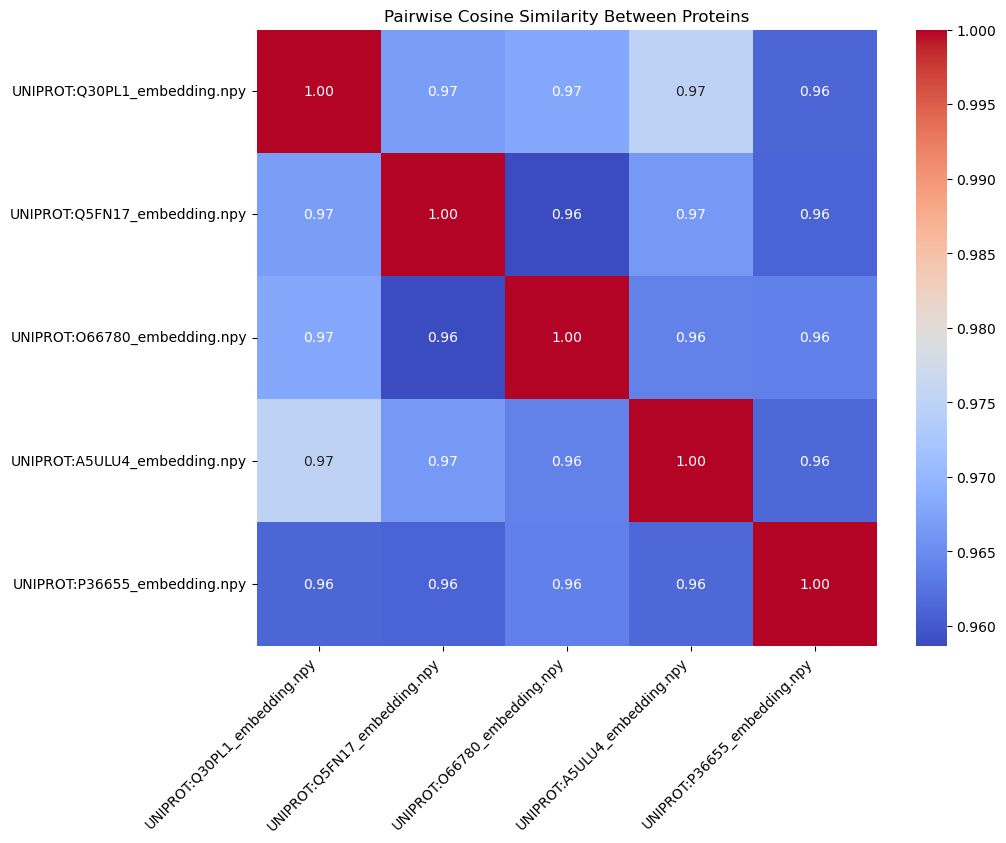

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute average embeddings for all proteins
average_embeddings = {}
for file_name in os.listdir(output_dir):
    if file_name.endswith("_embedding.npy"):
        file_path = os.path.join(output_dir, file_name)
        embedding = np.load(file_path)
        average_embeddings[file_name] = np.mean(embedding, axis=0)  # Mean over tokens

# Compute pairwise cosine similarity matrix
protein_names = list(average_embeddings.keys())
embeddings_matrix = np.stack(list(average_embeddings.values()))
similarity_matrix = cosine_similarity(embeddings_matrix)

# Plot similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=protein_names, yticklabels=protein_names, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Pairwise Cosine Similarity Between Proteins")
plt.xticks(rotation=45, ha="right")
plt.show()


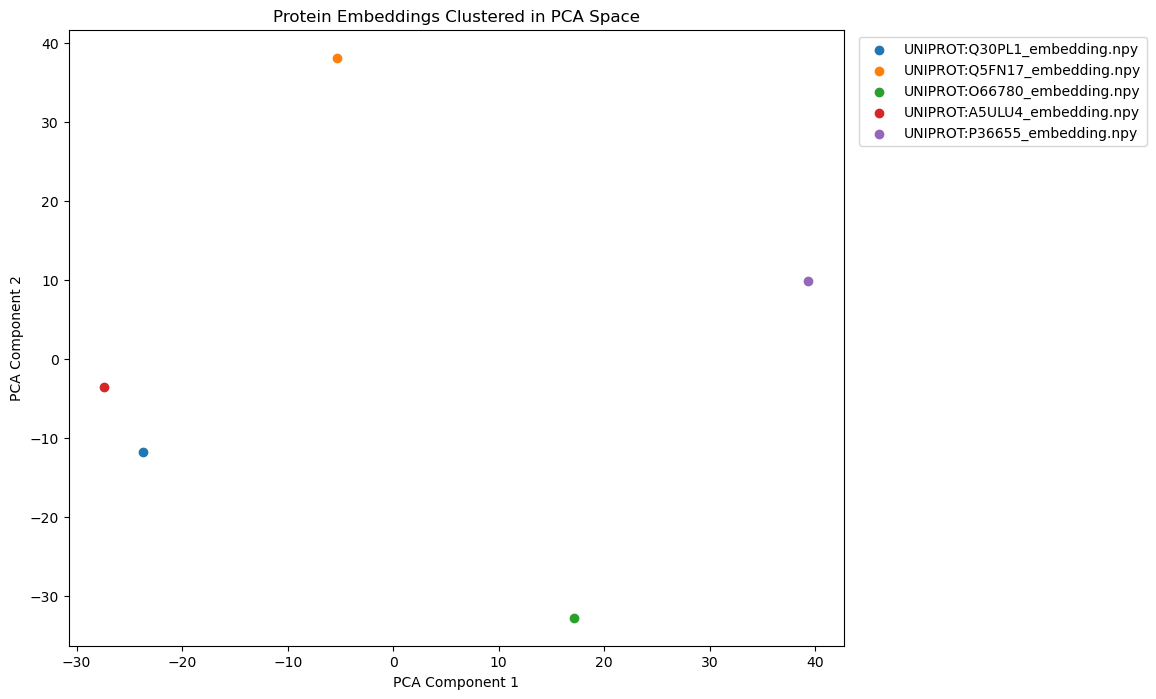

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

# Scatter plot
plt.figure(figsize=(10, 8))
for i, protein in enumerate(protein_names):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=protein)

plt.title("Protein Embeddings Clustered in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()
